In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sici
from scipy.linalg import toeplitz

In [2]:
def get_acf(tau,f1,f2):
    s1,c1=sici(2*np.pi*f1*tau)
    s2,c2=sici(2*np.pi*f2*tau)
    return c2-c1

In [3]:
N=2*1000

In [4]:
taus=np.fft.fftfreq(N)*N
print(taus)
f2=0.5
f1=0.05
print(f1*N,f2*N)
acf1=get_acf(taus[1:],f1,f2)
acf1=np.hstack([np.log(f2/f1),acf1])

[ 0.  1.  2. ... -3. -2. -1.]
100.0 1000.0


In [5]:
acf1[N//2]

0.0009943527239186958

In [109]:
taus2=np.linspace(0,N//2,N//2*10+1)

In [116]:
acf2=get_acf(taus2[1:],f1,f2)
acf2=np.hstack([10*np.log(f2/f1),10*acf2])

(0.0, 10.0)

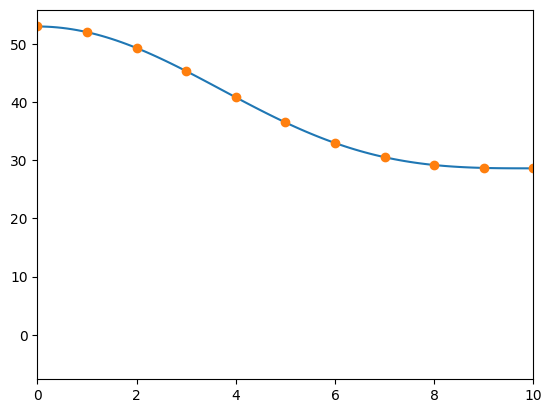

In [124]:
plt.plot(taus2[:N//2],acf2[:N//2])
plt.plot(taus[:N//2],acf1[:N//2],'o')
plt.xlim(0,10)

In [34]:
ps=np.fft.rfft(acf1-np.mean(acf1))

In [31]:
acf1

array([4.60517019, 4.58059989, 4.50809333, ..., 4.39118487, 4.50809333,
       4.58059989])

In [37]:
ps[1]

(-2.0263004879710125-6.267477991673057e-15j)

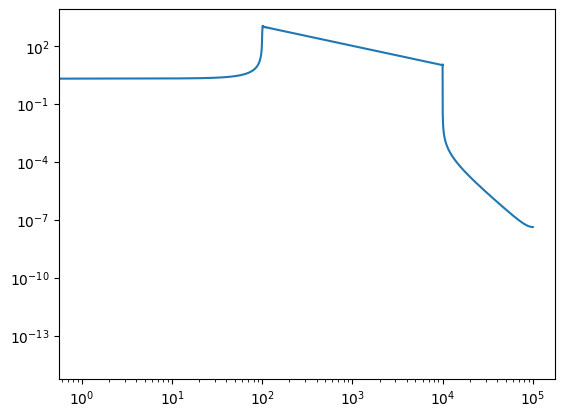

In [36]:
plt.loglog(np.abs(ps))

In [8]:
f1*N, f2*N

(100.0, 1000.0)

In [5]:
ps=np.zeros(N//2+1,dtype='complex128')
ps[int(f1*N):int(f2*N)+1]=1/np.arange(int(f1*N),int(f2*N)+1)
acf_dft=np.fft.irfft(ps)

(0.0, 10.0)

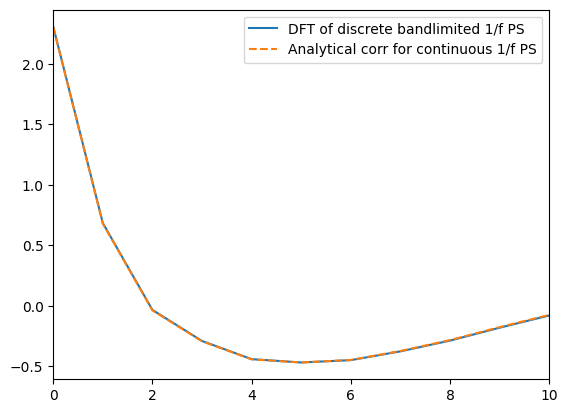

In [6]:
plt.plot(acf_dft*N/2, label='DFT of discrete bandlimited 1/f PS')
plt.plot(acf1,ls='--', label='Analytical corr for continuous 1/f PS')
plt.legend()
plt.xlim(0,10)

In [15]:
taus[N//2-1]

999.0

In [7]:
C=toeplitz(acf1[:N//2])+np.eye(N//2)*1e-4
Cinv=np.linalg.inv(C)

In [137]:
npoints=1000
dtaus=np.arange(1,npoints+1)/npoints
coeff_arr = np.zeros((len(dtaus),N//2))
my_tau = taus[:N//2].copy()

In [138]:
for i,dtau in enumerate(dtaus):
    tau=my_tau+dtau
    vec=get_acf(tau,f1,f2)
    vec=vec[::-1]
    coeff=Cinv@vec
    coeff_arr[i,:]=coeff

In [139]:
coeff_arr.shape

(1000, 1000)

In [135]:
u,s,vT=np.linalg.svd(coeff_arr)

In [140]:
u1,s1,vT1=np.linalg.svd(coeff_arr)

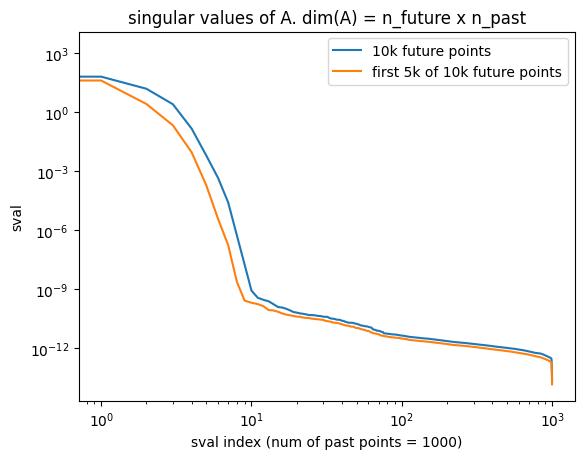

In [45]:
plt.loglog(s,label='10k future points')
plt.loglog(s1,label='first 5k of 10k future points')
plt.title("singular values of A. dim(A) = n_future x n_past")
plt.xlabel("sval index (num of past points = 1000)")
plt.ylabel("sval")
plt.legend()

In [36]:
s

array([1.71375893e+03, 6.22928974e+01, 1.51246134e+01, 2.47586649e+00,
       1.42559610e-01, 6.20589011e-03, 4.39752177e-04, 2.51632248e-05,
       5.33825461e-07, 1.70073193e-08, 8.46161098e-10, 3.67296167e-10,
       2.87321244e-10, 2.42062940e-10, 1.72620913e-10, 1.23685071e-10,
       1.16694875e-10, 1.01088025e-10, 8.44264034e-11, 6.88651086e-11,
       6.42892617e-11, 5.89075558e-11, 5.60731787e-11, 5.27867598e-11,
       4.87753244e-11, 4.81881495e-11, 4.75704085e-11, 4.55533178e-11,
       4.33708769e-11, 4.26822123e-11, 3.99243554e-11, 3.95381330e-11,
       3.91363901e-11, 3.43872436e-11, 3.19945486e-11, 3.14575100e-11,
       3.00538857e-11, 2.81807827e-11, 2.80420702e-11, 2.73067649e-11,
       2.46323261e-11, 2.45303175e-11, 2.20836034e-11, 2.11562440e-11,
       1.98171259e-11, 1.97318896e-11, 1.96878468e-11, 1.95596147e-11,
       1.87530222e-11, 1.77859857e-11, 1.73700426e-11, 1.66271333e-11,
       1.58767057e-11, 1.45613071e-11, 1.44364792e-11, 1.37806336e-11,
      

In [37]:
s1

array([5.93544900e+02, 3.96749586e+01, 2.54659646e+00, 2.11104694e-01,
       8.93517106e-03, 1.91973120e-04, 3.63570882e-06, 1.71848067e-07,
       2.33448502e-09, 2.61169646e-10, 2.03519750e-10, 1.75044157e-10,
       1.36810243e-10, 8.73425985e-11, 8.30347192e-11, 7.12359240e-11,
       5.84065705e-11, 5.12336555e-11, 4.72677387e-11, 4.42185459e-11,
       4.02443338e-11, 3.94585291e-11, 3.62871823e-11, 3.45799044e-11,
       3.42336223e-11, 3.21360101e-11, 3.08251186e-11, 2.99153008e-11,
       2.92264961e-11, 2.81919580e-11, 2.73341729e-11, 2.45557540e-11,
       2.36586089e-11, 2.27687981e-11, 2.16036266e-11, 2.00813614e-11,
       1.96479544e-11, 1.92404620e-11, 1.85680004e-11, 1.74583287e-11,
       1.65538641e-11, 1.55358368e-11, 1.45116246e-11, 1.41622736e-11,
       1.39286684e-11, 1.34186586e-11, 1.24800002e-11, 1.24363385e-11,
       1.21324005e-11, 1.10436666e-11, 1.06265608e-11, 1.05027090e-11,
       1.02449594e-11, 9.49850078e-12, 9.16721983e-12, 8.88778395e-12,
      

Text(0, 0.5, 'Cost ~FLOPS')

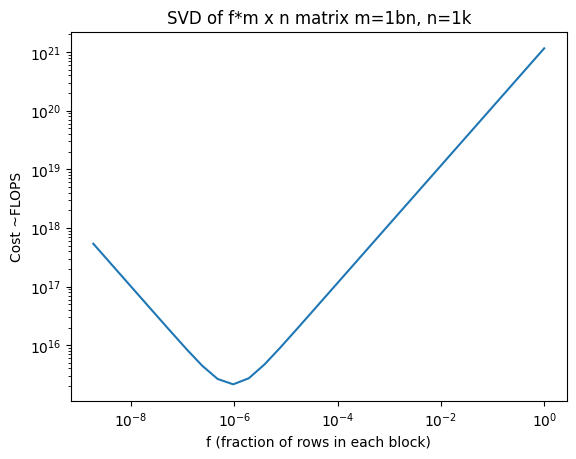

In [75]:
n=1000
m=1<<30
frac=2.**np.arange(-29,1)
a=frac*m
p=1/frac
svd_cost=p*(n*a**2+n**3)
plt.loglog(frac,svd_cost)
plt.title("SVD of f*m x n matrix m=1bn, n=1k")
plt.xlabel("f (fraction of rows in each block)")
plt.ylabel("Cost ~FLOPS")

In [71]:
svd_cost

array([5.36873059e+17, 2.68439751e+17, 1.34226318e+17, 6.71260439e+16,
       3.35887917e+16, 1.68459355e+16, 8.52604695e+15, 4.46918191e+15,
       2.64690781e+15, 2.14808763e+15, 2.72331126e+15, 4.66019051e+15,
       8.92716502e+15, 1.76577220e+16, 3.52171401e+16, 7.03851282e+16,
       1.40745680e+17, 2.81479073e+17, 5.62952001e+17, 1.12590093e+18,
       2.25180033e+18, 4.50359988e+18, 9.00719938e+18, 1.80143986e+19,
       3.60287971e+19, 7.20575941e+19, 1.44115188e+20, 2.88230376e+20,
       5.76460752e+20, 1.15292150e+21])

In [65]:
p

array([5.36870912e+08, 2.68435456e+08, 1.34217728e+08, 6.71088640e+07,
       3.35544320e+07, 1.67772160e+07, 8.38860800e+06, 4.19430400e+06,
       2.09715200e+06, 1.04857600e+06, 5.24288000e+05, 2.62144000e+05,
       1.31072000e+05, 6.55360000e+04, 3.27680000e+04, 1.63840000e+04,
       8.19200000e+03, 4.09600000e+03, 2.04800000e+03, 1.02400000e+03,
       5.12000000e+02, 2.56000000e+02, 1.28000000e+02, 6.40000000e+01,
       3.20000000e+01, 1.60000000e+01, 8.00000000e+00, 4.00000000e+00,
       2.00000000e+00])

In [76]:
f=1e-6
f**2*(2*f-1)

-9.99998e-13

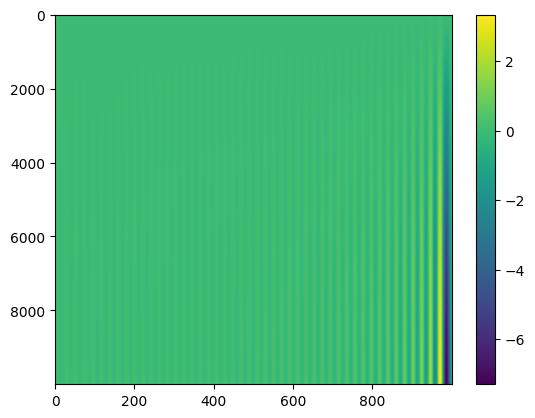

In [87]:
plt.imshow(coeff_arr,aspect='auto')
plt.colorbar()

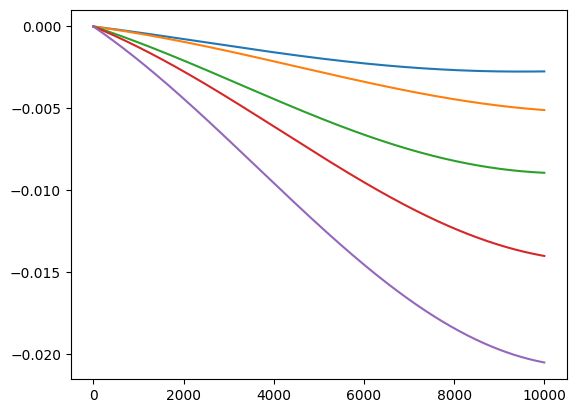

In [92]:
plt.plot(coeff_arr[:,0:5])

(0.0, 10.0)

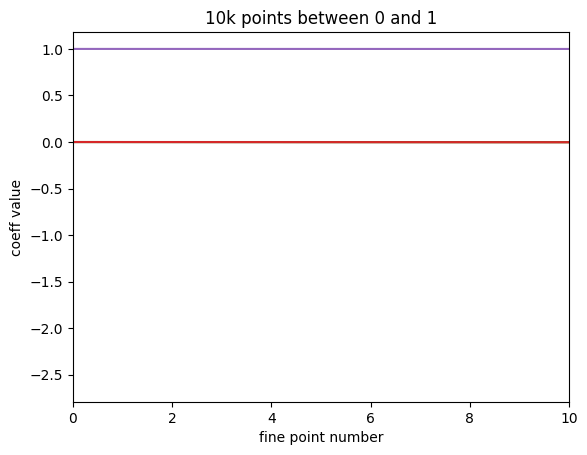

In [98]:
plt.plot(coeff_arr[:,-5:])
plt.title("10k points between 0 and 1")
plt.ylabel("coeff value")
plt.xlabel("fine point number")
plt.xlim(0,10)

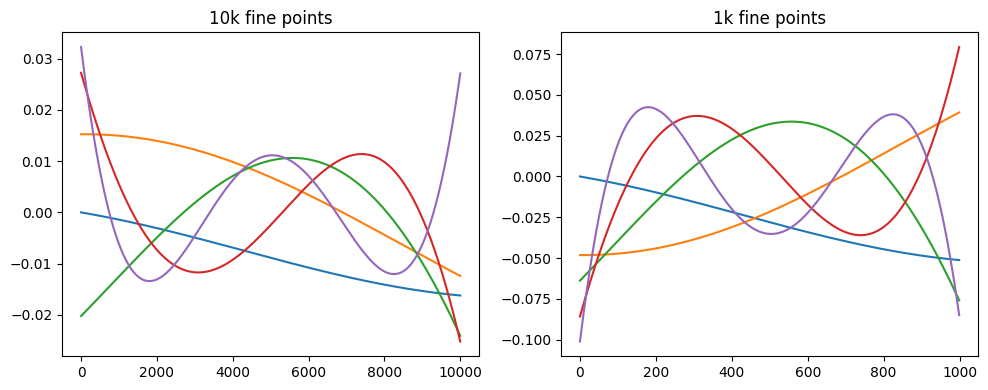

In [144]:
f=plt.gcf()
f.set_size_inches(10,4)
plt.subplot(121)
plt.title("10k fine points")
plt.plot(u[:,:5])
plt.subplot(122)
plt.title("1k fine points")
plt.plot(u1[:,:5])
plt.tight_layout()

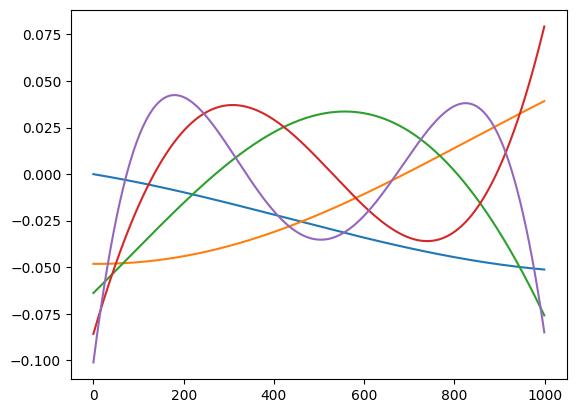

In [141]:
plt.plot(u1[:,:5])

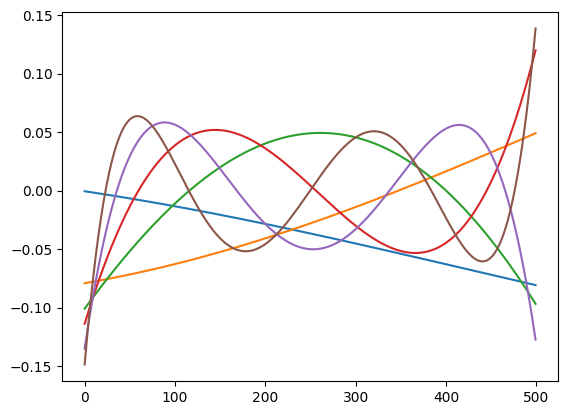

In [128]:
plt.plot(u1[:,:6])

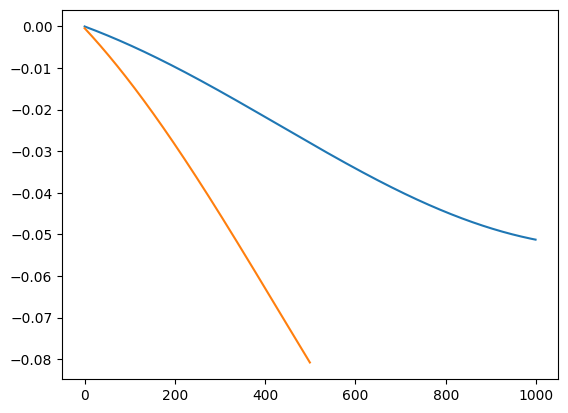

In [131]:
plt.plot(u[:,0])
plt.plot(u1[:,0])

In [130]:
s

array([5.42258890e+02, 1.96952682e+01, 4.78465240e+00, 7.82745331e-01,
       4.50496162e-02, 1.96166138e-03, 1.39144248e-04, 7.95126229e-06,
       1.68651558e-07, 5.37860687e-09, 2.67116320e-10, 1.14313482e-10,
       8.80576852e-11, 7.53985330e-11, 5.47157450e-11, 3.95466330e-11,
       3.70122952e-11, 3.16560964e-11, 2.65206183e-11, 2.20514887e-11,
       1.99347751e-11, 1.85257963e-11, 1.73861301e-11, 1.65762127e-11,
       1.55440922e-11, 1.49823341e-11, 1.47048707e-11, 1.43419577e-11,
       1.37013814e-11, 1.35978897e-11, 1.25375109e-11, 1.22626216e-11,
       1.22048400e-11, 1.07916767e-11, 1.01153208e-11, 9.68471422e-12,
       9.32712978e-12, 9.07023199e-12, 8.76313197e-12, 8.50320957e-12,
       7.83043988e-12, 7.16528425e-12, 6.93374251e-12, 6.81801436e-12,
       6.66703930e-12, 6.57252227e-12, 6.22818409e-12, 5.83813136e-12,
       5.76622472e-12, 5.52600693e-12, 5.01441825e-12, 4.93907435e-12,
       4.64968680e-12, 4.62393522e-12, 4.58174060e-12, 4.34749167e-12,
      